In this Notebook:
1. Preparation
2. The Elbow Technique
3. k-means clustering

# 1. Preparation

In [21]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [22]:
#display charts in the notebook
%matplotlib inline

In [23]:
#define path
path = r"/Users/katerinapilota/Desktop/Project_6"

In [24]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'patent_clean_final'))

In [25]:
#checking data
df.shape

(38438, 46)

In [26]:
df.head()

,Unnamed: 0,Office,Office (Code),Applicant Origin - Country,"1 - Electrical machinery, apparatus, energy",2 - Audio-visual technology,3 - Telecommunications,4 - Digital communication,5 - Basic communication processes,6 - Computer technology,...,"33 - Furniture, games",34 - Other consumer goods,35 - Civil engineering,Year,Applicant Origin - Region,Total patent numbers,GDP PPP (per capita),R&D (% GDP),Fertility Rate (15-19 yo),Patent count category
0,0,European Patent Office,EP,Liechtenstein,13,0,0,0,0,0,...,0,0,0,2019,Western Europe,13,NaN,NaN,NaN,NaN
1,1,Germany,DE,Liechtenstein,1,0,0,0,0,0,...,0,0,0,2019,Western Europe,1,NaN,NaN,NaN,Low
2,2,Italy,IT,Liechtenstein,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,0,NaN,NaN,NaN,Low
3,3,Japan,JP,Liechtenstein,1,0,0,0,0,0,...,0,0,0,2019,Western Europe,1,NaN,NaN,NaN,Low
4,4,Poland,PL,Liechtenstein,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,0,NaN,NaN,NaN,Low


In [27]:
#dropping unnecessary index columns
df.drop(columns=['Unnamed: 0'], inplace = True)

In [28]:
df.head()

,Office,Office (Code),Applicant Origin - Country,"1 - Electrical machinery, apparatus, energy",2 - Audio-visual technology,3 - Telecommunications,4 - Digital communication,5 - Basic communication processes,6 - Computer technology,7 - IT methods for management,...,"33 - Furniture, games",34 - Other consumer goods,35 - Civil engineering,Year,Applicant Origin - Region,Total patent numbers,GDP PPP (per capita),R&D (% GDP),Fertility Rate (15-19 yo),Patent count category
0,European Patent Office,EP,Liechtenstein,13,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,13,NaN,NaN,NaN,NaN
1,Germany,DE,Liechtenstein,1,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,1,NaN,NaN,NaN,Low
2,Italy,IT,Liechtenstein,0,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,0,NaN,NaN,NaN,Low
3,Japan,JP,Liechtenstein,1,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,1,NaN,NaN,NaN,Low
4,Poland,PL,Liechtenstein,0,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,0,NaN,NaN,NaN,Low


In [33]:
#keeping only continuous variables
df.drop (columns = ['Office', 'Office (Code)', 'Applicant Origin - Country', 'Applicant Origin - Region', 'Year', 'Patent count category'], inplace = True)

# 2. The Elbow Technique

In [34]:
#define a range of potential clusters in the data
num_cl = range(1, 10)

In [35]:
#define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [36]:
#define and call a score that repesents a rate of variation for teh given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
#getting rid of Nans
df.dropna(inplace = True)

In [41]:
#define and call a score that repesents a rate of variation for teh given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-9515726940783.924,
 -3307597311296.1187,
 -1637044016764.2454,
 -1091676868685.4691,
 -624948770587.2977,
 -423178537860.1617,
 -335406777265.43787,
 -257190800527.6957,
 -199212035680.5466]

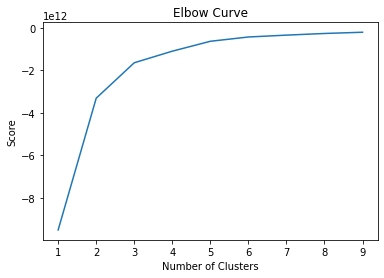

In [42]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal number of clusters is 3

# 3. k-means clustering

In [43]:
#create the k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [44]:
#fit the k-means object to the data
kmeans.fit(df)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=3, n_jobs=-1)

In [45]:
df['clusters'] = kmeans.fit_predict(df)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [46]:
#checking the new cluster column
df.head()

,"1 - Electrical machinery, apparatus, energy",2 - Audio-visual technology,3 - Telecommunications,4 - Digital communication,5 - Basic communication processes,6 - Computer technology,7 - IT methods for management,8 - Semiconductors,9 - Optics,10 - Measurement,...,31 - Mechanical elements,32 - Transport,"33 - Furniture, games",34 - Other consumer goods,35 - Civil engineering,Total patent numbers,GDP PPP (per capita),R&D (% GDP),Fertility Rate (15-19 yo),clusters
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2009.215647,0.72413,70.176,1
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,2009.215647,0.72413,70.176,1
557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2009.215647,0.72413,70.176,1
558,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,2,2009.215647,0.72413,70.176,1
559,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,2009.215647,0.72413,70.176,1


In [47]:
#checking the distribution of the 'clusters' column
df['clusters'].value_counts()

0    14765
1    12966
2      781
Name: clusters, dtype: int64

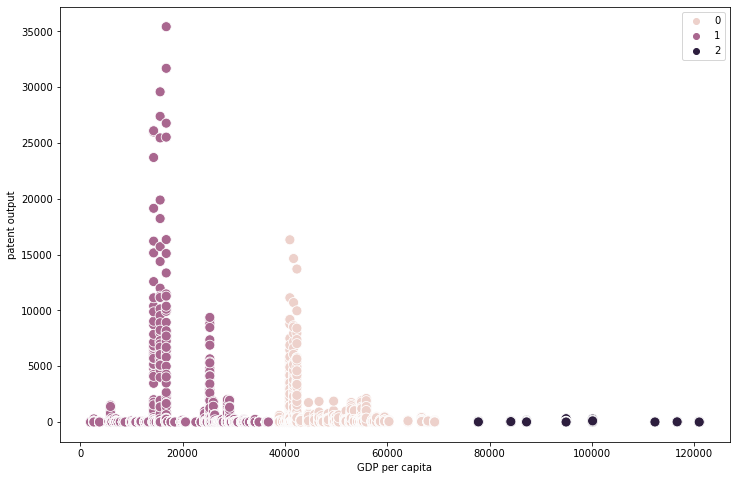

In [52]:
# Plot the clusters for 'patent output' and 'GDP per capita' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP PPP (per capita)'], y=df['Total patent numbers'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('patent output') # Label y-axis.
plt.show()

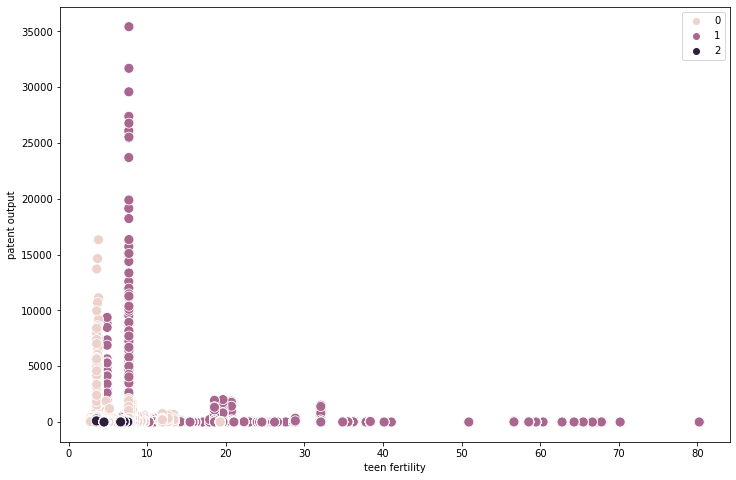

In [49]:
# Plot the clusters for 'patent output' and 'adolescent fertility' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Fertility Rate (15-19 yo)'], y=df['Total patent numbers'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('teen fertility') # Label x-axis.
plt.ylabel('patent output') # Label y-axis.
plt.show()

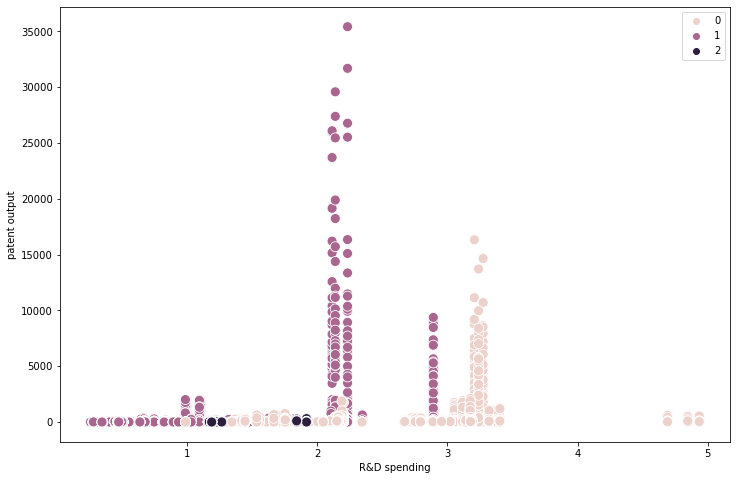

In [50]:
# Plot the clusters for 'patent output' and 'R&D expenditure' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['R&D (% GDP)'], y=df['Total patent numbers'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('R&D spending') # Label x-axis.
plt.ylabel('patent output') # Label y-axis.
plt.show()

These plots are still vague. While some meaning is clearer (pink and light purple spend most on R&D and have higher patent outputs, for example) more information is needed to see the statistical characteristics of each cluster, to ascertin a clearer pattern. 

In [51]:
#renaming clusters
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [54]:
#finding mean and median of each cluster according to IVs
df.groupby('cluster').agg({'R&D (% GDP)':['mean', 'median'], 
                         'Fertility Rate (15-19 yo)':['mean', 'median'], 
                         'GDP PPP (per capita)':['mean', 'median'],
                          'Total patent numbers':['mean', 'median']})

R&D (% GDP)           Fertility Rate (15-19 yo)           \
                   mean    median                      mean   median   
cluster                                                                
dark purple    1.293217  1.223522                  5.640777   4.7270   
pink           2.544735  2.673260                  6.361685   5.1692   
purple         1.761721  1.822824                 15.809255  10.4920   

            GDP PPP (per capita)              Total patent numbers         
                            mean       median                 mean median  
cluster                                                                    
dark purple          98139.60676  94940.97079            12.655570      5  
pink                 50683.01275  50435.58344            95.614426     12  
purple               23433.72084  25440.84119           113.625713      3

There are relationships between the variables in this data that are non-linear, it appears. For example, while the Pink cluster is the highest performing in terms of patent output (median), and also clearly correlates with higher R&D expenditure as a percentage of GDP. The other two variables are also interesting in the Pink cluster: the fertility rate is the second lowest (but close in both mean and median to the dark purple cluster with the lowest rate). The rate of GDP is squarely in the middle, but comparing it to the higher numbers in the Dark Purple cluster suggests that there is a non-linear relatinship (perhaps these countries are outliers, with extenuating circumstances cot representative of this study and should be excluded). 

This final test – finding the mean and median of each cluster – is the most informative of the two machine learning exercises. From this test, it's clear that higher patent output does indeed corelate with lower adolescent fertility, higher R&D exopenditure, and with an least middle-level GDP per capita. 

Further analystical steps would introduce more World Development Indicators to look for patterns using k-means clustering, and by removing outliers. It would also be im=nformative to segment the data into teh high-performing 'pink' group and and look for relationships with a larger number of continuous variables.

In [55]:
#exporting data
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'patent_clean_final.csv'))